In [ ]:
#Import necessary Libraries

import numpy as np
from keras.datasets import fashion_mnist

In [ ]:
# Load fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Explore the dataset
# Check the shape and size of x_train, x_test, y_train, y_test
print ("Number of samples/observations in training data: " + str(len(x_train)))
print ("Number of labels in training data: " + str(len(y_train)))
print ("Dimensions of a single image in x_train:" + str(x_train[0].shape))
print("-------------------------------------------------------------")
print ("Number of samples/observations in test data: " + str(len(x_test)))
print ("Number of labels in test data: " + str(len(y_test)))
print ("Dimensions of single image in x_test:" + str(x_test[0].shape))

Number of samples/observations in training data: 60000
Number of labels in training data: 60000
Dimensions of a single image in x_train:(28, 28)
-------------------------------------------------------------
Number of samples/observations in test data: 10000
Number of labels in test data: 10000
Dimensions of single image in x_test:(28, 28)


In [ ]:
print(y_train.shape)

(60000,)


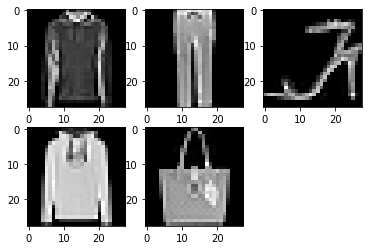

In [ ]:
# Visualization library to visualize images 
import matplotlib.pyplot as plt

# Plotting 5 images, Subplot arugments represent nrows, ncols and index
# Color map is set to grey since our image dataset is grayscale
plt.subplot(231)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(232)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(233)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(234)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(235)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))


# Visualize the images
plt.show()

In [ ]:
#Import necessary keras specific libraries

from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
import tensorflow as tf

# Setting Training Parameters like batch_size, epochs
batch_size = 128
epochs = 1000

# Storing the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

''' Getting the data in the right 'shape' as required by Keras i.e. adding a 4th 
dimension to our data thereby changing the original image shape of (60000,28,28) 
to (60000,28,28,1)'''
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Storing the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# Changing image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the data by changing the image pixel range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

# Performing one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Calculate the number of classes and number of pixels 
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

# Create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adadelta(
    learning_rate=0.001, rho=0.95, epsilon=1e-07
), metrics = ['accuracy'])

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                        

In [ ]:
print(y_test.shape)

(10000, 10)


In [ ]:
model_fitting = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/1000
469/469 [==============================] - 14s 18ms/step - loss: 2.4212 - accuracy: 0.2925 - val_loss: 1.5345 - val_accuracy: 0.4944
Epoch 2/1000
469/469 [==============================] - 5s 12ms/step - loss: 1.5197 - accuracy: 0.5107 - val_loss: 0.8681 - val_accuracy: 0.6985
Epoch 3/1000
469/469 [==============================] - 5s 11ms/step - loss: 1.2084 - accuracy: 0.6045 - val_loss: 0.7461 - val_accuracy: 0.7383
Epoch 4/1000
469/469 [==============================] - 5s 11ms/step - loss: 1.0505 - accuracy: 0.6536 - val_loss: 0.6802 - val_accuracy: 0.7598
Epoch 5/1000
469/469 [==============================] - 5s 11ms/step - loss: 0.9601 - accuracy: 0.6840 - val_loss: 0.6366 - val_accuracy: 0.7729
Epoch 6/1000
469/469 [==============================] - 5s 11ms/step - loss: 0.8974 - accuracy: 0.7027 - val_loss: 0.6048 - val_accuracy: 0.7834
Epoch 7/1000
469/469 [==============================] - 5s 11ms/step - loss: 0.8462 - accuracy: 0.7166 - val_loss: 0.5811 - val_a

In [3]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Change the directory to current working directory
import os
os.mkdir("/content/gdrive/My Drive/Apparel_Detection")
os.chdir("/content/gdrive/My Drive/Apparel_Detection")

In [ ]:
# Save the model with the name clothing_classification_model
model.save('/content/gdrive/My Drive/Apparel_Detection/apparel_classifier_model_new.h5')

In [1]:

# Import few more necessary libraries.
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# Function to load and prepare the image in right shape
def load_image(filename):
	# Load the image
	img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
	# Convert the image to array
	img = img_to_array(img)
	# Reshape the image into a sample of 1 channel
	img = img.reshape(1, 28, 28, 1)
	# Prepare it as pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img




In [4]:
import numpy as np

# Load an image and predict the apparel class
img = load_image('/content/gdrive/My Drive/trouser.jpg')
# Load the saved model
model = load_model('/content/gdrive/My Drive/Apparel_Detection/apparel_classifier_model.h5')
# Predict the apparel class
class_prediction = np.argmax(model.predict(img)[0])
print(class_prediction)

#Map apparel category with the numerical class
if class_prediction == 0:
  product = "T-shirt/top"
elif class_prediction == 1:
  product = "Trouser"
elif class_prediction == 2:
  product = "Pullover"
elif class_prediction == 3:
  product = "Dress"
elif class_prediction == 4:
  product = "Coat"
elif class_prediction == 5:
  product = "Sandal"
elif class_prediction == 6:
  product = "Shirt"
elif class_prediction == 7:
  product = "Sneaker"
elif class_prediction == 8:
  product = "Bag"
else:
  product = "Ankle boot"

print(product)

3
Dress


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')